# SMS Spam Classifier 
[Dataset on kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download)

## Contents
* Data cleaning
* Data understanding and EDA
* Data preprocessing
* Modeling
* Evaluation
* Deployment

Loading dependencies and dataset

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(font_scale=1.4)

In [5]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.shape

(5572, 5)

## Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We remove Unnamed columns because of NaN values

In [9]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

Renaming v1 and v2 columns

In [12]:
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [13]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Two targets

In [14]:
data[['target']].nunique()

target    2
dtype: int64

Encoding target using LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
data['target'] = encoder.fit_transform(data['target'])

In [18]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Detecting duplicated rows and missing values

In [19]:
data.isna().sum()

target    0
text      0
dtype: int64

In [22]:
data.duplicated().sum()

403

Drop duplicated rows

In [23]:
data = data.drop_duplicates(keep='first')

In [24]:
data.shape

(5169, 2)

---
## Data Understanding and EDA

In [25]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Target values

In [27]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

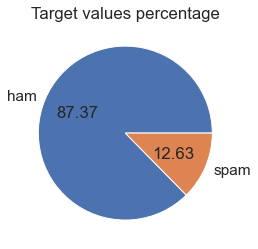

In [31]:
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.title('Target values percentage')
plt.show()

**Data is imbalanced**

## Number of chars, words, sentences in each sms

In [32]:
import nltk

In [33]:
data['num_characters'] = data['text'].apply(len)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13428\2310173184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters'] = data['text'].apply(len)


In [35]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_13428\3852860757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [36]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_13428\1299526392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [37]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Describe text features

In [38]:
data[['num_characters', 'num_words', 'num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.286129,13.226400,1.0,9.0,15.0,26.0,219.0
num_sentences,5169.0,1.961308,1.432583,1.0,1.0,1.0,2.0,38.0


## Number of chars in each target

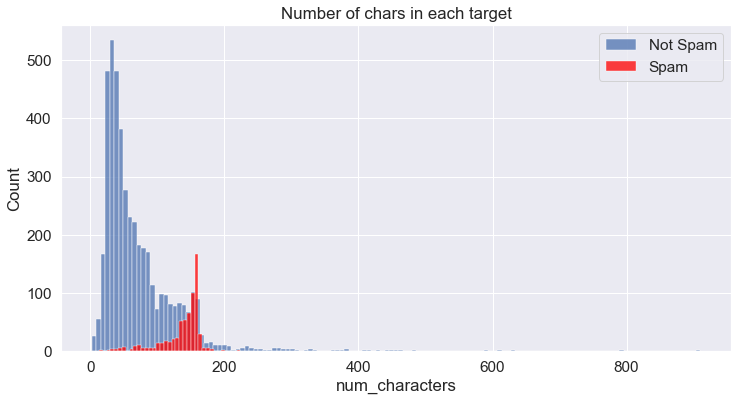

In [46]:
plt.figure(figsize=(12, 6))
plt.title('Number of chars in each target')
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'], color='red')
plt.legend(['Not Spam', 'Spam'])
plt.show()

In [49]:
print('Not Spam Mean:', data[data['target'] == 0]['num_characters'].mean())

Not Spam Mean: 70.45925597874225


In [50]:
print('Spam Mean:', data[data['target'] == 1]['num_characters'].mean())

Spam Mean: 137.89127105666157


As you can see, number of characters in spam messages is more than non-spam messages.

Spam messages have 138 chars on average and non-spam ones have 70 chars on average.

## Pairplot and Correlation

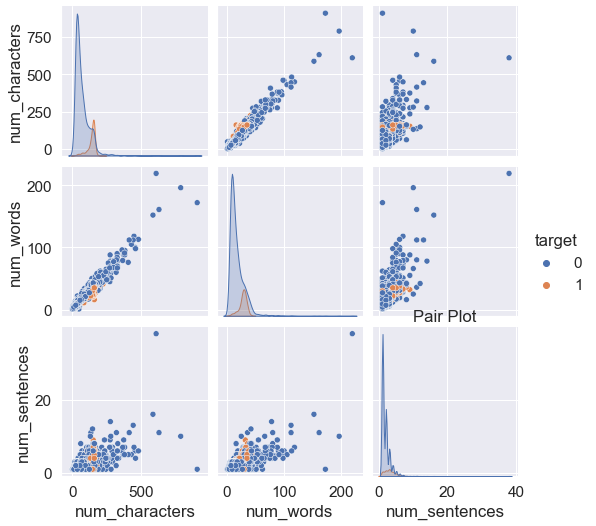

In [51]:
sns.pairplot(data, hue='target')
plt.show()

There are some outliers

## Correlation Matrix

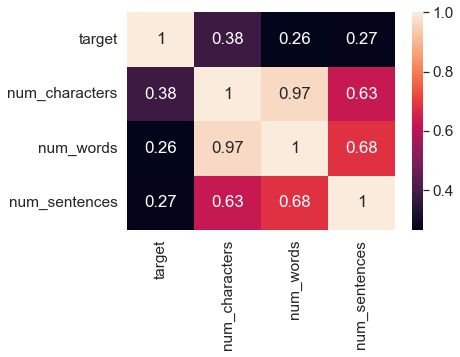

In [52]:
sns.heatmap(data.corr(), annot=True)
plt.show()

As you can see, there is a high correlation between number of characters and number of words. And we have a good correlation between number of words and sentences and number of characters and sentences. 

---
## Data Preprocessing
* To lower case
* Tokenization
* Removing special characters
* Removing stopwords and punctuation
* Stemming


In [66]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [67]:
ps = PorterStemmer()

In [68]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [69]:
data['text'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [70]:
transform_text(data['text'][6])

'even brother like speak treat like aid patent'

In [71]:
data['transformed_text'] = data['text'].apply(transform_text)

In [72]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Words in Spam Messages

In [90]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [91]:
len(spam_corpus)

9883

In [92]:
from collections import Counter

30 most common words

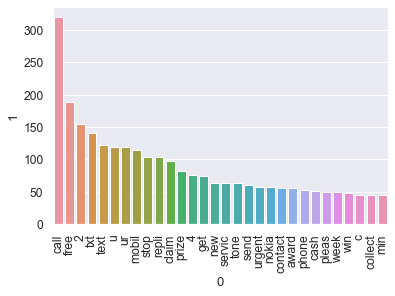

In [95]:
sns.set(font_scale=1.1)
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [96]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

## Words in Non-Spam Messages

In [97]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [98]:
len(ham_corpus)

34771

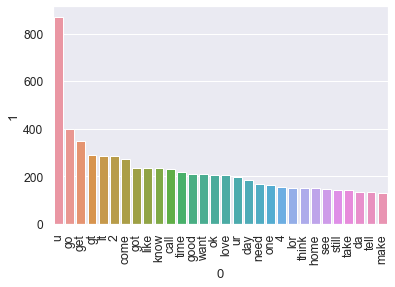

In [99]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [100]:
Counter(ham_corpus).most_common(30)

[('u', 871),
 ('go', 401),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 272),
 ('got', 236),
 ('like', 234),
 ('know', 234),
 ('call', 232),
 ('time', 217),
 ('good', 212),
 ('want', 208),
 ('ok', 207),
 ('love', 206),
 ('ur', 197),
 ('day', 184),
 ('need', 170),
 ('one', 164),
 ('4', 155),
 ('lor', 153),
 ('think', 149),
 ('home', 149),
 ('see', 145),
 ('still', 142),
 ('take', 141),
 ('da', 133),
 ('tell', 133),
 ('make', 129)]

---
## Modeling
* Single models
* Voting models

In [101]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Encoding text using tf idf

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
tfidf = TfidfVectorizer()

In [108]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [109]:
X.shape

(5169, 6629)

In [110]:
y = data['target'].values

In [111]:
y.shape

(5169,)

So we have 5169 samples and 6629 features

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, f1_score

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### We use the following algorithms
* Logistic regression
* SVM
* DTree
* Multinomial naive bayes
* KNN
* Random forest
* Adaboost
* Bagging classifier
* Extra trees
* XGBoost
* Gradient boosting

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

D:\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


We tested different hyperparameters and here are the bests

In [117]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [118]:
clfs = {
    'SVC': svc,
    'KN': knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [119]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

Start training

In [120]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy: 0.9729206963249516
Precision: 0.9661016949152542
For KN
Accuracy: 0.9003868471953579
Precision: 1.0
For NB
Accuracy: 0.9593810444874274
Precision: 1.0
For DT
Accuracy: 0.9342359767891683
Precision: 0.8301886792452831
For LR
Accuracy: 0.9526112185686654
Precision: 0.9320388349514563
For RF
Accuracy: 0.97678916827853
Precision: 0.9913793103448276
For AdaBoost
Accuracy: 0.9613152804642167
Precision: 0.9298245614035088
For BgC
Accuracy: 0.960348162475822
Precision: 0.875968992248062
For ETC
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
For GBDT
Accuracy: 0.9516441005802708
Precision: 0.8928571428571429


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For xgb
Accuracy: 0.9700193423597679
Precision: 0.928


### Visualize Performances

In [123]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),
                               'Accuracy': accuracy_scores,
                               'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [124]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [127]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.976789
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,LR,Accuracy,0.952611
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.960348


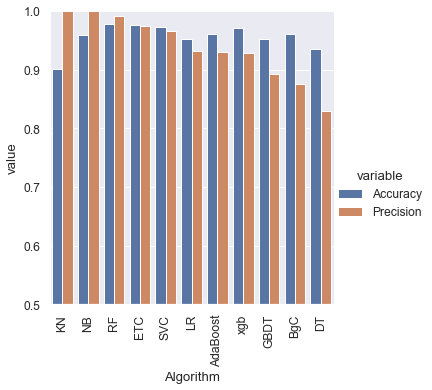

In [133]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

## Which has the highest F1 score?

In [143]:
scores = []
for name, clf in clfs.items():
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred)
    scores.append((name, score))

In [145]:
sorted(scores, key=lambda x: x[1], reverse=True)

[('RF', 0.9055118110236221),
 ('ETC', 0.9027237354085604),
 ('SVC', 0.890625),
 ('xgb', 0.8821292775665398),
 ('BgC', 0.8464419475655431),
 ('AdaBoost', 0.8412698412698412),
 ('NB', 0.8205128205128205),
 ('GBDT', 0.8),
 ('LR', 0.7966804979253111),
 ('DT', 0.7213114754098361),
 ('KN', 0.4046242774566474)]

## Classification Report for RF Model

In [137]:
y_pred = rfc.predict(X_test)

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.99      0.83      0.91       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



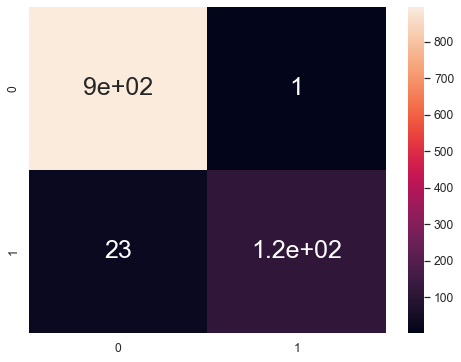

In [140]:
df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[i for i in '01'], columns=[i for i in '01'])
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, annot_kws={"size": 25})
plt.show()

## Voting Classifier

In [146]:
from sklearn.ensemble import VotingClassifier

In [147]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [148]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [149]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [150]:
y_pred = voting.predict(X_test)

In [151]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9787234042553191
Precision: 0.9915254237288136
F1-score: 0.9140625


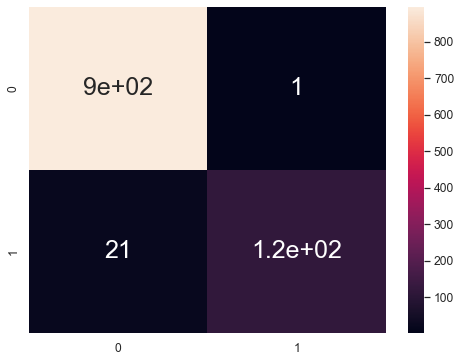

In [153]:
df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[i for i in '01'], columns=[i for i in '01'])
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, annot_kws={"size": 25})
plt.show()

It's the best model and we save it for the following tasks

### Saving Model

In [152]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(voting, open('model.pkl', 'wb'))

Check app.py for streamlit application